---
### Reducing the number of edges: find a rational rule

1. Set window: Confine the lifespan of event, probably 1-2 months. This is the easiest way. Plus, it is crucial for time-series analysis.  
One thing that should be considered is, there are two types of events: powerful or negligible.

2. it looks like power-law function. $f= p^{-t}$ is basic form of it, we (may) need to modify this. 

3. Using collective attention: how long a event-related hashtag survive. but it is hard to find event-specific hashtag, and also most of events are not mentioned in Twitter.

1 and 2 seems to be plausible (and probably work at the same time), but 3 seem like unfeasible.

---

In [3]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# import dataset
df = pd.read_csv("6before-network.csv", index_col=0)
df.head()

,ind,ind_t,date,adr,p,n_killed,n_injured,state,LON,LAT,...,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,mental_health_sources,sources_additional_age,type
0,0,0,2014-01-01,Rockingham Street and Berkley Avenue Extended ...,2.855649,2,2,Virginia,-76.278935,36.830789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2014-01-03,Farmers Boulevard and 133rd Avenue Queens New ...,2.390389,1,3,New York,-73.762898,40.677500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2014-01-05,829 Parade St Erie Pennsylvania,2.390389,1,3,Pennsylvania,-80.074524,42.130038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,2014-01-11,3430 W. Capitol Street Jackson Mississippi,1.515717,0,4,Mississippi,-90.228321,32.323689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,2014-01-12,University Drive Huntsville Alabama,1.620657,0,5,Alabama,-86.650390,34.736562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['ind', 'ind_t', 'date', 'adr', 'p', 'n_killed', 'n_injured', 'state',
       'LON', 'LAT', 'case', 'summary', 'age_of_shooter',
       'prior_signs_mental_health_issues', 'mental_health_details',
       'weapons_obtained_legally', 'where_obtained', 'weapon_type',
       'weapon_details', 'race', 'gender', 'mental_health_sources',
       'sources_additional_age', 'type'],
      dtype='object')

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
# descriptive: p

print(df['p'].describe(),"\n",
      "meidan: ", df['p'].median())


count    2087.000000
mean        2.279607
std         1.052959
min         1.515717
25%         1.515717
50%         2.390389
75%         2.711770
max        23.575299
Name: p, dtype: float64 
 meidan:  2.3903891703159093


### if only relatively powerful events affect all future events within 7 days

In [6]:
G1 = nx.DiGraph()

In [7]:
for n in range(0, len(df), 1):
  G1.add_node(n,
             ind = df['ind'][n],
             ind_t = df['ind_t'][n],
             p = df['p'][n],
             n_killed = df['n_killed'][n],
             n_injured = df['n_injured'][n],
             LON = df['LON'][n],
             LAT = df['LAT'][n])

In [8]:
for i in G1.nodes():
  for j in G1.nodes():
    if 0 < G1.nodes[j]['ind_t']-G1.nodes[i]['ind_t'] < 7 and G1.nodes[i]['p'] > G1.nodes[j]['p']:
      G1.add_edge(i,j)
    else:
      pass

In [9]:
nx.info(G1)

'Name: \nType: DiGraph\nNumber of nodes: 2087\nNumber of edges: 9462\nAverage in degree:   4.5338\nAverage out degree:   4.5338'

### Degree distribution

In [10]:
G1_degree = []
for i in range(len(G1.nodes())):
    G1_dgr = G1.degree(i)
    G1_degree.append(G1_dgr)

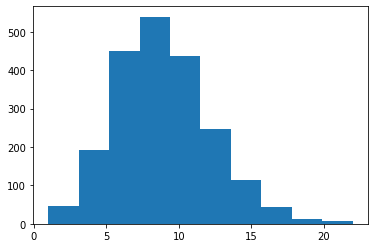

In [11]:
G1_dgr_dist = plt.hist(G1_degree)

In [12]:
nx.write_gexf(G1, "G1.gexf")

### if only relatively powerful events affect all future events within 10 days

In [13]:
G2 = nx.DiGraph()
for n in range(0, len(df), 1):
  G2.add_node(n,
             ind = df['ind'][n],
             ind_t = df['ind_t'][n], 
             p = df['p'][n],
             n_killed = df['n_killed'][n],
             n_injured = df['n_injured'][n],
             LON = df['LON'][n],
             LAT = df['LAT'][n])
for i in G2.nodes():
  for j in G2.nodes():
    if 0 < G2.nodes[j]['ind_t']-G2.nodes[i]['ind_t'] < 10 and G2.nodes[i]['p'] > G2.nodes[j]['p']:
      G2.add_edge(i,j)
    else:
      pass

In [14]:
nx.info(G2)

'Name: \nType: DiGraph\nNumber of nodes: 2087\nNumber of edges: 14175\nAverage in degree:   6.7920\nAverage out degree:   6.7920'

In [15]:
G2_degree = []
for i in range(len(G2.nodes())):
    G2_dgr = G2.degree(i)
    G2_degree.append(G2_dgr)

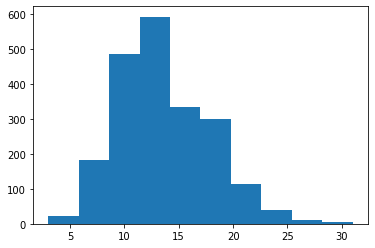

In [16]:
G2_dgr_dist = plt.hist(G2_degree)

In [17]:
nx.write_gexf(G2, "G2.gexf")

### if only relatively powerful events affect all future events within 14 days

In [18]:
G3 = nx.DiGraph()

In [19]:
for n in range(0, len(df), 1):
  G3.add_node(n,
             ind = df['ind'][n],
             ind_t = df['ind_t'][n], 
             p = df['p'][n],
             n_killed = df['n_killed'][n],
             n_injured = df['n_injured'][n],
             LON = df['LON'][n],
             LAT = df['LAT'][n])
for i in G3.nodes():
  for j in G3.nodes():
    if 0 < G3.nodes[j]['ind_t']-G3.nodes[i]['ind_t'] < 14 and G3.nodes[i]['p'] > G3.nodes[j]['p']:
      G3.add_edge(i,j)
    else:
      pass

In [20]:
nx.info(G3)

'Name: \nType: DiGraph\nNumber of nodes: 2087\nNumber of edges: 20478\nAverage in degree:   9.8122\nAverage out degree:   9.8122'

### Degree distribution

In [21]:
G3_degree = []
for i in range(len(G3.nodes())):
    G3_dgr = G3.degree(i)
    G3_degree.append(G3_dgr)

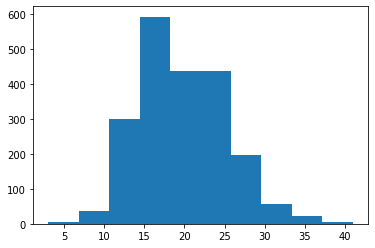

In [22]:
G3_dgr_dist = plt.hist(G3_degree)

In [23]:
nx.write_gexf(G3, "G3.gexf")

### if only relatively powerful events affect all future events within 21 days

In [6]:
G4 = nx.DiGraph()
for n in range(0, len(df), 1):
  G4.add_node(n,
             ind = df['ind'][n],
             ind_t = df['ind_t'][n], 
             p = df['p'][n],
             n_killed = df['n_killed'][n],
             n_injured = df['n_injured'][n],
             LON = df['LON'][n],
             LAT = df['LAT'][n])
for i in G4.nodes():
  for j in G4.nodes():
    if 0 < G4.nodes[j]['ind_t']-G4.nodes[i]['ind_t'] < 21 and G4.nodes[i]['p'] > G4.nodes[j]['p']:
      G4.add_edge(i,j)
    else:
      pass

nx.info(G4)

'Name: \nType: DiGraph\nNumber of nodes: 2087\nNumber of edges: 31324\nAverage in degree:  15.0091\nAverage out degree:  15.0091'

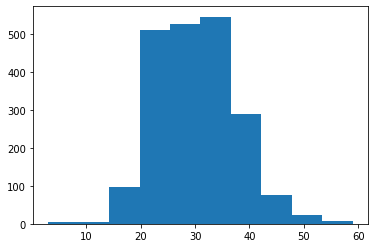

In [7]:
G4_degree = []
for i in range(len(G4.nodes())):
    G4_dgr = G4.degree(i)
    G4_degree.append(G4_dgr)
    
G4_dgr_dist = plt.hist(G4_degree)

In [8]:
nx.write_gexf(G4, "G4.gexf")

### if only relatively powerful events affect all future events within 28 days

In [10]:
G5 = nx.DiGraph()
for n in range(0, len(df), 1):
  G5.add_node(n,
             ind = df['ind'][n],
             ind_t = df['ind_t'][n], 
             p = df['p'][n],
             n_killed = df['n_killed'][n],
             n_injured = df['n_injured'][n],
             LON = df['LON'][n],
             LAT = df['LAT'][n])
for i in G5.nodes():
  for j in G5.nodes():
    if 0 < G5.nodes[j]['ind_t']-G5.nodes[i]['ind_t'] < 28 and G5.nodes[i]['p'] > G5.nodes[j]['p']:
      G5.add_edge(i,j)
    else:
      pass

nx.info(G5)

'Name: \nType: DiGraph\nNumber of nodes: 2087\nNumber of edges: 42198\nAverage in degree:  20.2195\nAverage out degree:  20.2195'

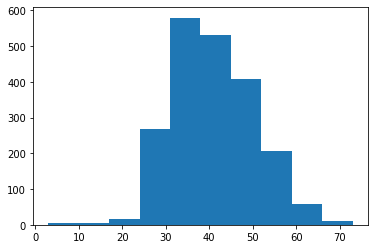

In [11]:
G5_degree = []
for i in range(len(G5.nodes())):
    G5_dgr = G5.degree(i)
    G5_degree.append(G5_dgr)
    
G5_dgr_dist = plt.hist(G5_degree)

In [12]:
nx.write_gexf(G5, "G5.gexf")

### if only relatively powerful events affect all future events within 31 days

In [18]:
G6 = nx.DiGraph()
for n in range(0, len(df), 1):
  G6.add_node(n,
             ind = df['ind'][n],
             ind_t = df['ind_t'][n], 
             p = df['p'][n],
             n_killed = df['n_killed'][n],
             n_injured = df['n_injured'][n],
             LON = df['LON'][n],
             LAT = df['LAT'][n])
for i in G6.nodes():
  for j in G6.nodes():
    if 0 < G6.nodes[j]['ind_t']-G6.nodes[i]['ind_t'] < 31 and G6.nodes[i]['p'] > G6.nodes[j]['p']:
      G6.add_edge(i,j)
    else:
      pass

nx.info(G6)

'Name: \nType: DiGraph\nNumber of nodes: 2087\nNumber of edges: 46829\nAverage in degree:  22.4384\nAverage out degree:  22.4384'

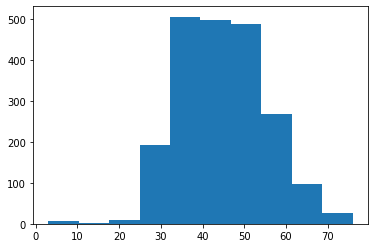

In [19]:
G6_degree = []
for i in range(len(G6.nodes())):
    G6_dgr = G6.degree(i)
    G6_degree.append(G6_dgr)
    
G6_dgr_dist = plt.hist(G6_degree)

In [24]:
nx.write_gexf(G6, "G6.gexf")

### if only relatively powerful events affect all future events within 60 days

In [25]:
G7 = nx.DiGraph()
for n in range(0, len(df), 1):
  G7.add_node(n,
             ind = df['ind'][n],
             ind_t = df['ind_t'][n], 
             p = df['p'][n],
             n_killed = df['n_killed'][n],
             n_injured = df['n_injured'][n],
             LON = df['LON'][n],
             LAT = df['LAT'][n])
for i in G7.nodes():
  for j in G7.nodes():
    if 0 < G7.nodes[j]['ind_t']-G7.nodes[i]['ind_t'] < 60 and G7.nodes[i]['p'] > G7.nodes[j]['p']:
      G7.add_edge(i,j)
    else:
      pass

nx.info(G7)

'Name: \nType: DiGraph\nNumber of nodes: 2087\nNumber of edges: 90722\nAverage in degree:  43.4701\nAverage out degree:  43.4701'

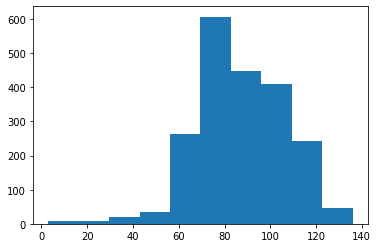

In [26]:
G7_degree = []
for i in range(len(G7.nodes())):
    G7_dgr = G7.degree(i)
    G7_degree.append(G7_dgr)
    
G7_dgr_dist = plt.hist(G7_degree)

In [27]:
nx.write_gexf(G7, "G7.gexf")

### if only relatively powerful events affect all future events within 90 days

In [28]:
G8 = nx.DiGraph()
for n in range(0, len(df), 1):
  G8.add_node(n,
             ind = df['ind'][n],
             ind_t = df['ind_t'][n], 
             p = df['p'][n],
             n_killed = df['n_killed'][n],
             n_injured = df['n_injured'][n],
             LON = df['LON'][n],
             LAT = df['LAT'][n])
for i in G8.nodes():
  for j in G8.nodes():
    if 0 < G8.nodes[j]['ind_t']-G8.nodes[i]['ind_t'] < 90 and G8.nodes[i]['p'] > G8.nodes[j]['p']:
      G8.add_edge(i,j)
    else:
      pass

nx.info(G8)

'Name: \nType: DiGraph\nNumber of nodes: 2087\nNumber of edges: 134449\nAverage in degree:  64.4221\nAverage out degree:  64.4221'

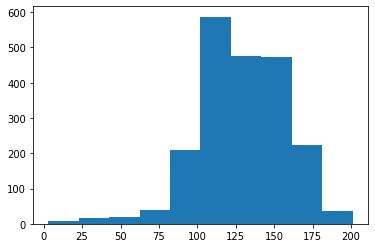

In [29]:
G8_degree = []
for i in range(len(G8.nodes())):
    G8_dgr = G8.degree(i)
    G8_degree.append(G8_dgr)
    
G8_dgr_dist = plt.hist(G8_degree)

In [30]:
nx.write_gexf(G8, "G8.gexf")

### if only relatively powerful events affect all future events within 120 days

In [31]:
G9 = nx.DiGraph()
for n in range(0, len(df), 1):
  G9.add_node(n,
             ind = df['ind'][n],
             ind_t = df['ind_t'][n], 
             p = df['p'][n],
             n_killed = df['n_killed'][n],
             n_injured = df['n_injured'][n],
             LON = df['LON'][n],
             LAT = df['LAT'][n])
for i in G9.nodes():
  for j in G9.nodes():
    if 0 < G9.nodes[j]['ind_t']-G9.nodes[i]['ind_t'] < 120 and G9.nodes[i]['p'] > G9.nodes[j]['p']:
      G9.add_edge(i,j)
    else:
      pass

nx.info(G9)

'Name: \nType: DiGraph\nNumber of nodes: 2087\nNumber of edges: 176575\nAverage in degree:  84.6071\nAverage out degree:  84.6071'

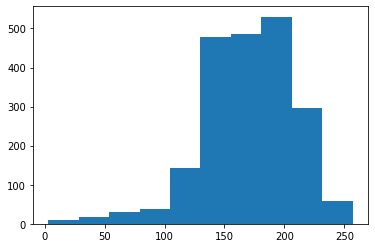

In [32]:
G9_degree = []
for i in range(len(G9.nodes())):
    G9_dgr = G9.degree(i)
    G9_degree.append(G9_dgr)
    
G9_dgr_dist = plt.hist(G9_degree)

In [34]:
nx.write_gexf(G9, "G9.gexf")